# Hypothesis Testing with Insurance Data
- Priscilla Cole
-May 2024

## Business Problem
We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?



For each question, make sure to:

- State your Null Hypothesis and Alternative Hypothesis
- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test.
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis 
- Show a supporting visualization that helps display the result

# Import Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats

# Load Data

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Do smokers have higher insurance than non-smokers?

In [3]:
# create a filter for smokers and their insurance charges
smoker_df = df.loc[df.smoker =='yes', ['smoker','charges']].copy()
smoker_df.head()

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768


In [4]:
# create a filter for non-smokers and their insurance charges
nosmoker_df = df.loc[df.smoker =='no', ['smoker','charges']].copy()
nosmoker_df.head()

,smoker,charges
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
5,no,3756.62160


In [5]:
# info for smokers df
len(smoker_df)

274

In [6]:
# info for no smokers df
len(nosmoker_df)

1064

In [7]:
q1_plot_df = pd.concat([smoker_df, nosmoker_df], axis=0).copy()

State your Null Hypothesis and Alternative Hypothesis
H0 Null Hypothesis

No significant difference in insurance costs exists between smokers and non-smokers.

HA Alternate Hypothesis

A significant difference in insurance costs exists between smokers and non-smokers.

## Select the correct test according to the data type and number of samples
1. Datatype:
Numeric
2. Number of Samples/Groups being compared:
2 groups (smokers and no smokers)
3. Correct Test:
2 Sample T-Test

### Outliers Assumption

In [8]:
smokers_group = smoker_df['charges']
smokers_outliers = np.abs(stats.zscore(smokers_group)) > 3
smokers_outliers.sum()

0

In [9]:
nosmokers_group = nosmoker_df['charges']
nosmokers_outliers = np.abs(stats.zscore(nosmokers_group)) > 3
nosmokers_outliers.sum()

24

In [10]:
len(smokers_group)

274

In [11]:
len(nosmokers_group)

1064

In [12]:
# to remove the outliers and help the test
nosmokers_group = nosmokers_group.loc[~nosmokers_outliers]
len(nosmokers_group)

1040

### Normality Assumption

In [13]:
ho = 'No significant difference in insurance costs exists between smokers and non-smokers.'
ha = 'A significant difference in insurance costs exists between smokers and non-smokers.'
# standard value for alpha is 5%, which is .05 in decimal value
alpha = .05
group = smokers_group

In [14]:
# Run the test and display the results
statistic, pvalue = stats.normaltest(group)
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was less than the alpha value of {alpha}, so')
    print(ha)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was greater than the alpha value of {alpha}, so')
    print(ho)   

The p-value for the test was 5.564930630036463e-14
It was less than the alpha value of 0.05, so
A significant difference in insurance costs exists between smokers and non-smokers.


In [15]:
h0 = "The sample comes from a normal distribution."
ha = "The sample does not come from a normal distribution."
alpha = .05
group = nosmokers_group

In [16]:
# Run the test and display the results
statistic, pvalue = stats.normaltest(group)
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho)  

The p-value for the test was 2.6945416315543976e-36
It was < the alpha value of 0.05, so
The sample does not come from a normal distribution.


### Equal Variance Assumption

In [17]:
ho = "All input samples are from populations with equal variances."
ha = "All input samples are not from populations with equal variances."
alpha = .05

In [18]:
# Run the test and display the results
statistic, pvalue = stats.levene(smokers_group, nosmokers_group)
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was less than the alpha value of {alpha}, so')
    print(ha)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was greater than the alpha value of {alpha}, so')
    print(ho)    

The p-value for the test was 2.4247238784347824e-97
It was less than the alpha value of 0.05, so
All input samples are not from populations with equal variances.


### Execute Selected Test (or alternate if necessary)

In [19]:
# Run the test and display the results
statistic, pvalue = stats.ttest_ind(smokers_group, nosmokers_group, equal_var=False) #double check equal_var=True/False
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was less than the alpha value of {alpha}, so')
    print(ha)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was greater than the alpha value of {alpha}, so')
    print(ho)

The p-value for the test was 2.575322662587431e-104
It was less than the alpha value of 0.05, so
All input samples are not from populations with equal variances.


## Supporting Visualization

In [20]:
q1_plot_df

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768
...,...,...
1332,no,11411.6850
1333,no,10600.5483
1334,no,2205.9808
1335,no,1629.8335


### A statistical significance exists. The null hypothesis is rejected and the alternative is supported

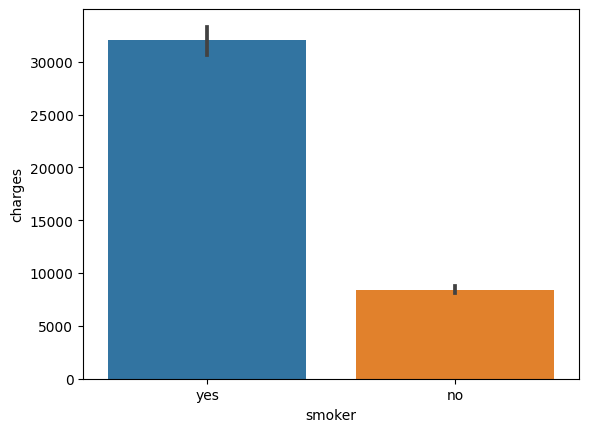

In [21]:
# bar graph to show the correlation between smokers and charges
sns.barplot(data=q1_plot_df, x='smoker', y='charges');

# Are men more likely to smoke than women?

In [22]:
# men filter
men_df = df.loc[df.sex =='male', ['sex','smoker']].copy()
men_df.head()

,sex,smoker
1,male,no
2,male,no
3,male,no
4,male,no
8,male,no


In [23]:
# women filter
women_df = df.loc[df.sex =='female', ['sex','smoker']].copy()
men_df.head()

,sex,smoker
1,male,no
2,male,no
3,male,no
4,male,no
8,male,no


In [24]:
len(men_df)

676

In [25]:
len(women_df)

662

In [26]:
# plot for q2's supporting visualization
q2_plot_df = pd.concat([men_df, women_df], axis=0).copy()

### State your Null Hypothesis and Alternative Hypothesis
H0 Null Hypothesis

- No significant difference exists in the likelihood of men than women to be smokers.

HA Alternate Hypothesis

- A significant difference exists in the likelihood of men than women to be smokers.

### Select the correct test according to the data type and number of samples
- Datatype:
Categorical
- Number of Samples/Groups being compared: 
2
- Correct Test:
Chi-Square

### Test the assumptions of your selected test.
- There are two categorical variables
Men
Women
- The outcomes are independent
Confirmed, the outcomes are independent. Men and women are independent of each other

In [27]:
ho = 'No significant difference exists in the likelihood of men than women to be smokers.'
ha = 'A significant difference exists in the likelihood of men than women to be smokers.'
# standard value for alpha
alpha = .05

In [28]:
# calculate the contingency table with pd.cross-tab
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


### Supporting Visualization

In [29]:
# Run the test and display the results
chi2, pvalue, deg_free, expected_vals = stats.chi2_contingency(table)
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was less than the alpha value of {alpha}, so')
    print(ha)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was greater than the alpha value of {alpha}, so')
    print(ho)

The p-value for the test was 0.006548143503580696
It was less than the alpha value of 0.05, so
A significant difference exists in the likelihood of men than women to be smokers.


###  A significant difference exists in the likelihood of men to be smokers than women. 

In [30]:
q2_plot_df

,sex,smoker
1,male,no
2,male,no
3,male,no
4,male,no
8,male,no
...,...,...
1332,female,no
1334,female,no
1335,female,no
1336,female,no


# Do different regions have different charges, on average?

In [31]:
# outliers assumption

groups = {}
for region in df['region'].unique():
    temp_df = df.loc[df['region'] == region, 'charges']
    groups[region] = temp_df
groups.keys()


dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [32]:
# remove outliers and state how many were removed in f strings

for region, data in groups.items():
    # Calculate the number of outliers
    outliers = np.abs(stats.zscore(data)) > 3
    print(f"{outliers.sum()} outliers were removed from the {region} group.")
    # Remove the outliers
    groups[region] = data.loc[~outliers]

8 outliers were removed from the southwest group.
2 outliers were removed from the southeast group.
7 outliers were removed from the northwest group.
4 outliers were removed from the northeast group.


In [33]:
# normality assumption

norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data),
                       'p':p}


In [34]:
# Display a dataframe created from the norm_results dictonary and transpose it 
pd.DataFrame(norm_results).T

,n,p
southwest,317.0,7.728611e-22
southeast,362.0,1.936990e-13
northwest,318.0,2.940543e-19
northeast,320.0,3.557877e-17


In [35]:
# Create and display a dataframe created from the norm_results dictonary and transpose it 
norm_results_df = pd.DataFrame(norm_results).T
# See if group pvalue was significant or not with a column indicate 
norm_results_df['sig'] = norm_results_df['p'] < .05

In [36]:
# Display the results
norm_results_df

,n,p,sig
southwest,317.0,7.728611e-22,True
southeast,362.0,1.936990e-13,True
northwest,318.0,2.940543e-19,True
northeast,320.0,3.557877e-17,True


In [37]:
# equal variance assumption
# establish a statement for where its met or not
ho = "All input samples are from populations with equal variances."
ha = "All input samples are not from populations with equal variances."
# alpha is 5%
alpha = .05

In [38]:
# Run the test and display the results
statistic, pvalue = stats.levene(*groups.values())
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was less than the alpha value of {alpha}, so')
    print(ha)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was greater than the alpha value of {alpha}, so')
    print(ho) 

The p-value for the test was 3.2035503711783993e-06
It was less than the alpha value of 0.05, so
All input samples are not from populations with equal variances.


# Run the selected test

In [39]:
ho = 'No significant difference in charges exists between regions.'
ha = 'A significant difference in charges exists between regions.'
# keep alpha at 5%
alpha = .05

In [40]:

# Run the test and display the results
statistic, pvalue = stats.kruskal(*groups.values())
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho)


The p-value for the test was 0.07468847911322242
It was > the alpha value of 0.05, so
No significant difference in charges exists between regions.


## The null hypothesis was not rejected. 

# Supporting Visuals

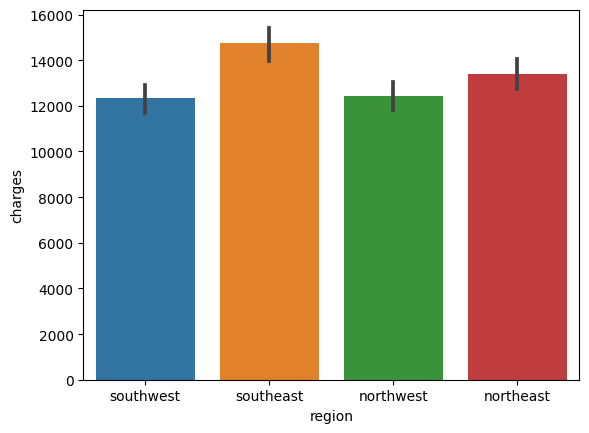

In [41]:
sns.barplot(data=df, x='region', y='charges', ci=68);